# Imports

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Read and Adjust data

In [89]:
# read data and describe it
data = pd.read_csv("data/magic04.data", header=None)
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [90]:
# check the count of every class
data[10].value_counts()

10
g    12332
h     6688
Name: count, dtype: int64

In [91]:
# balance data by randomly removing samples of the larger class
balanced_data = data.groupby(10)
balanced_data = balanced_data.apply(lambda x: x.sample(balanced_data.size().min()).reset_index(drop=True))

In [92]:
# check the newly balanced data class counts
balanced_data[10].value_counts()

10
g    6688
h    6688
Name: count, dtype: int64

In [93]:
# seprate features and classes
x_train = np.array(balanced_data.iloc[:, 0:10])
y_train = np.array([1 if c == "g" else 0 for c in balanced_data[10]])


In [94]:
# function to plot each feature with the target to visualize each feature range and effect
# y2 optional parameter to plot predections as well as target if desired
def plot_features(x, y, y2=None, n_features=2):
    fig, ax = plt.subplots(1, n_features, sharey=True)

    for i in range(len(ax)):
        ax[i].scatter(x[:, i], y)

    if y2 is not None:
        for i in range(len(ax)):
            ax[i].scatter(x[:, i], y2, color='red', facecolors="none")


    fig.set_figwidth(20)
    fig.set_figheight(7)

    ax[0].set_ylabel("price")

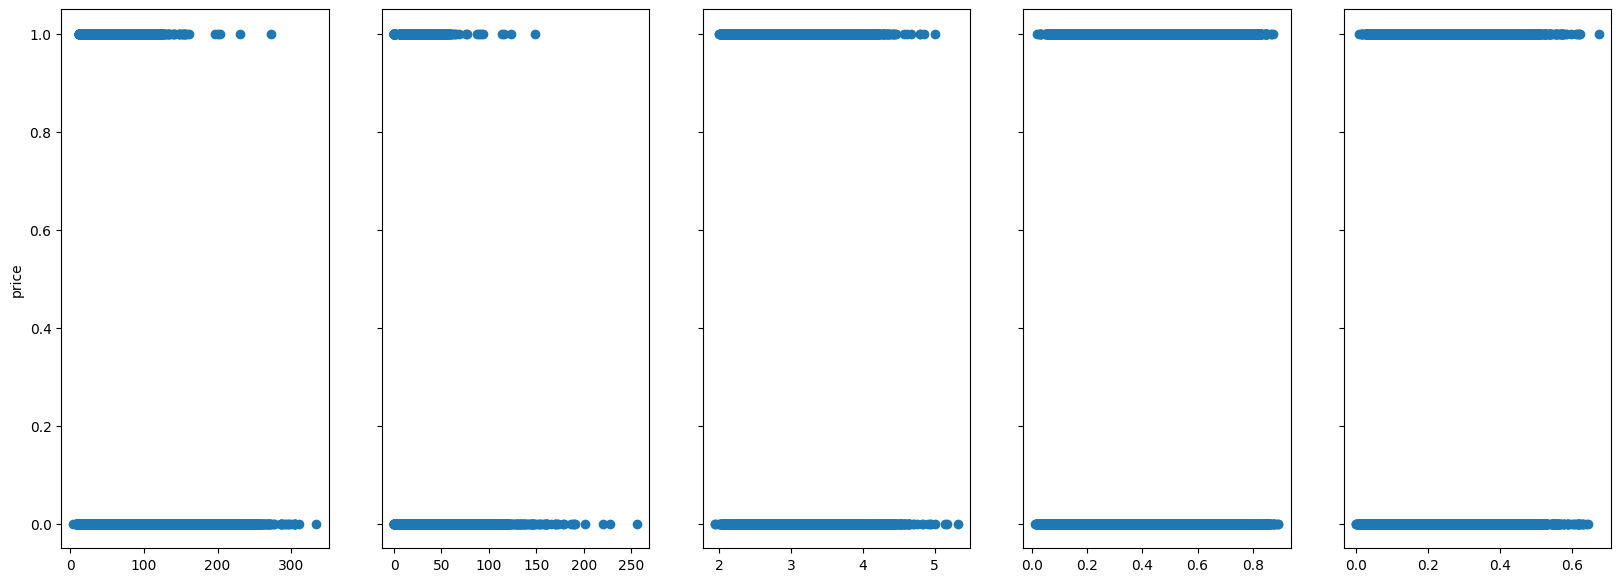

In [95]:
# ploting features before normalization
plot_features(x_train, y_train, n_features=5)

In [96]:
# normalize data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [97]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04
mean,-8.499315e-17,5.099589e-17,-3.569712e-16,4.122168e-16,-2.172637e-16,-1.699863e-17,8.499315e-18,-7.968108e-18,-1.699863e-16,9.774212e-17
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.128369e+00,-1.133638e+00,-1.886809e+00,-1.972996e+00,-1.900907e+00,-6.870579e+00,-6.012476e+00,-8.864038e+00,-1.163248e+00,-2.522274e+00
25%,-6.934990e-01,-5.751306e-01,-7.300501e-01,-7.877348e-01,-7.795265e-01,-2.538273e-01,-3.984755e-01,-4.827220e-01,-8.962889e-01,-6.943650e-01
50%,-3.908945e-01,-3.104404e-01,-1.840354e-01,-1.320698e-01,-1.541242e-01,1.569770e-01,1.263869e-01,-9.935869e-03,-2.937791e-01,-1.967927e-02
75%,3.995963e-01,1.215724e-01,5.819877e-01,6.830667e-01,6.405931e-01,4.772863e-01,4.899077e-01,4.653670e-01,7.817942e-01,6.271440e-01
max,5.892364e+00,1.112763e+01,5.197870e+00,2.767510e+00,4.071219e+00,8.890610e+00,4.095882e+00,7.724199e+00,2.172524e+00,3.915111e+00


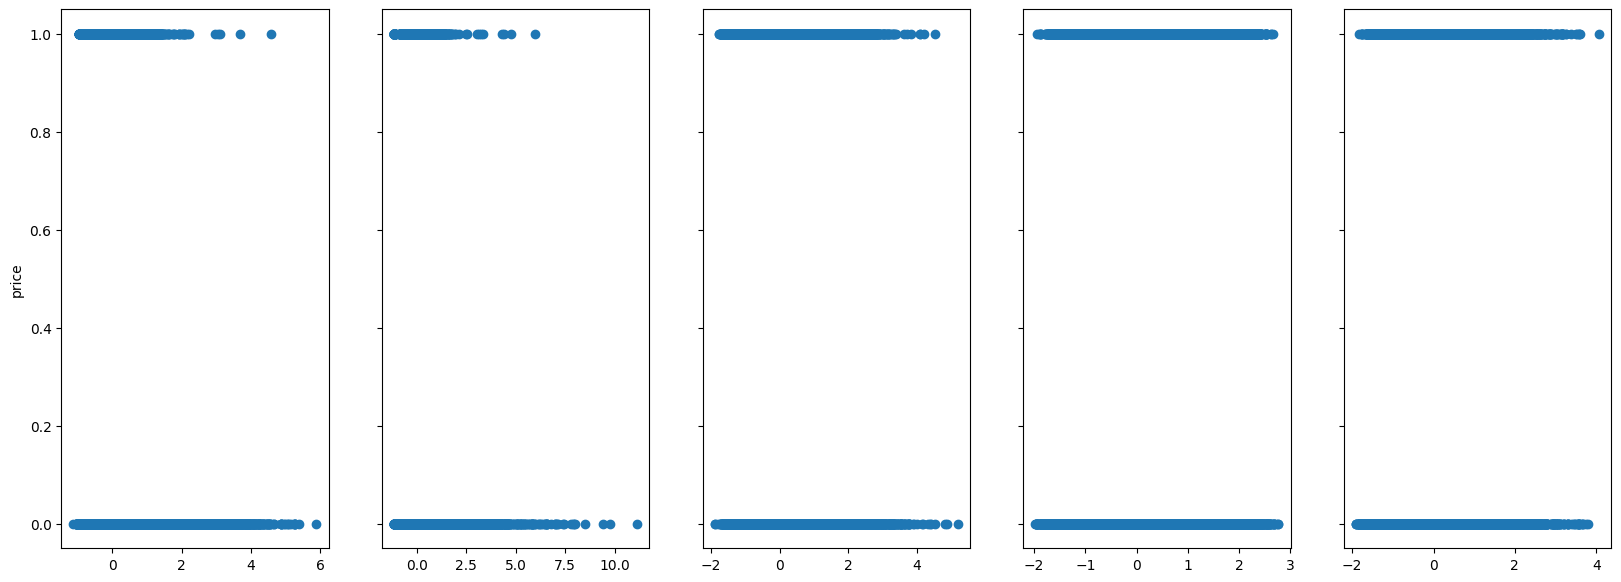

In [98]:
# ploting features after normalization
plot_features(x_train, y_train, n_features=5)

In [120]:
# split data to trainging and evaluation sets
normalized_data = np.concatenate((x_train, y_train.reshape(-1, 1)), axis=1)

In [117]:
# split data according to classes
g_data = normalized_data[normalized_data[:, 10] == 1]
h_data = normalized_data[normalized_data[:, 10] == 0]

In [122]:
# split data to test and evaluate
g_train, g_eval = np.split(g_data,[int(0.7 * g_data.shape[0])])
h_train, h_eval = np.split(h_data,[int(0.7 * h_data.shape[0])])

train_data = np.concatenate((g_train, h_train))
eval_data = np.concatenate((g_eval, h_eval))

x_train = train_data[:, 0:10]
y_train = train_data[:, 10]

x_eval = eval_data[:, 0:10]
y_eval = eval_data[:, 10]

# Train model

In [126]:
model = LogReg()
model.fit(x_train, y_train)

LogisticRegression()

In [130]:
prediction = model.predict(x_eval)
print(classification_report(y_eval, prediction))

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      2007
         1.0       0.75      0.82      0.78      2007

    accuracy                           0.77      4014
   macro avg       0.78      0.77      0.77      4014
weighted avg       0.78      0.77      0.77      4014

